In [1]:
import spacy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import re
import nltk

In [4]:
df = pd.read_csv('E:/dataset/imdb/train.csv',names=['ratings','reviews'])

In [5]:
df.head()

,ratings,reviews
0,0,I just don't get some of the big premises of t...
1,0,Please note that I haven't seen the film since...
2,0,I went for this movie believing it had good ra...
3,0,"First off, let me say that I am a great believ..."
4,0,OK i own this DVD i got it new at amazon... i ...


In [6]:
df.iloc[0]

ratings                                                    0
reviews    I just don't get some of the big premises of t...
Name: 0, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
ratings    25000 non-null int64
reviews    25000 non-null object
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


In [8]:
df[df['ratings']==1].head()

,ratings,reviews
12500,1,This was another great Tom Berenger movie.. Bu...
12501,1,This movie is really not all that bad. But the...
12502,1,"This is not a ""loose"", but a precise, faithful..."
12503,1,MULHOLLAND DRIVE made me the definitive fan of...
12504,1,I just saw this movie today with my children (...


In [9]:
df.iloc[12500][1]

'This was another great Tom Berenger movie.. But some people are right it was like another SGT BARNES character but it was still awsome.. Tom Berenger played a great sniper in the jungles Of Panama! Billy Zane was a wuss at first just like Cpl Upham from Saving Private Ryan but then he got a little more aggresive in the end! Sniper was awsome and action buffs should watch it.. I remind you it wouldnt have as much action as a reg action flick.. i got this one on DVD too and it is excellent!'

In [10]:
df.iloc[0][1]

"I just don't get some of the big premises of this episode - that Miranda is so remarkable, and that there's anything so ugly it would make you insane. Someone here made the remark that maybe it's the frequency of the light waves or something rather than it being ugliness. Miranda is just a jerk. The episode is slow, inconsistent and way too talky. I also don't quite understand why Kolos is an ambassador - why doesn't the Federation just leave the damn Medusans be? There's one part I do like, when Kolos is speaking through Spock about the loneliness of the human experience. Overall, I love TOS and even at its lamest, I'll always tune in. This episode though - mmm, I wouldn't purchase it except for a used copy under $3."

## AFTER reading some of the reviews it is has been clear that the rating 0 is negative reviews and 1 is positive reviews.

In [11]:
df.shape

(25000, 2)

In [12]:
df['ratings'].value_counts()

1    12500
0    12500
Name: ratings, dtype: int64

**we can say that 50% of the reviews are bad and 50% of reviews are positive**

In [13]:
df_test = pd.read_csv('E:/dataset/imdb/test.csv',names = ['ratings','reviews'])

In [14]:
df_test.head()

,ratings,reviews
0,0,"Sometimes I think that somewhere in the ""Lifet..."
1,0,"As a flagship show, Attack of the Show (AOTS) ..."
2,0,I was so looking forward to seeing this when i...
3,0,Absolutely the worst experience I have ever be...
4,0,Ladies and Gentlemen.. Be sad (or be glad !).....


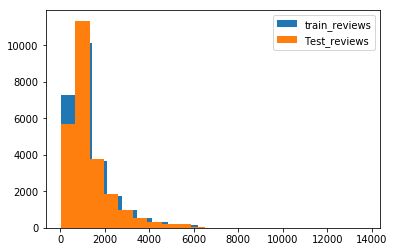

In [15]:
length_train= df['reviews'].str.len()
length_test= df_test['reviews'].str.len()

plt.hist(length_train,bins=20,label="train_reviews")
plt.hist(length_test, bins = 20, label="Test_reviews")

plt.legend()
plt.show()

### DATA CLEANING

In [16]:
combi = df.append(df_test,ignore_index=True,sort=False)

In [17]:
combi.shape

(50000, 2)

In [18]:
combi.head()

,ratings,reviews
0,0,I just don't get some of the big premises of t...
1,0,Please note that I haven't seen the film since...
2,0,I went for this movie believing it had good ra...
3,0,"First off, let me say that I am a great believ..."
4,0,OK i own this DVD i got it new at amazon... i ...


In [19]:
#data cleaning 
# to remove the unwanted text pattern from the reviews.

def remove_pattern(input_text,pattern):
    re =  re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'', input_text)
    return input_text

**removing some unwanted pattern like characters and hashtag and spaces with the help of regular expression.**

In [20]:
combi['clean_review'] =  combi['reviews'].str.replace("[^a-zA-Z#]"," ")

In [21]:
combi.head()

,ratings,reviews,clean_review
0,0,I just don't get some of the big premises of t...,I just don t get some of the big premises of t...
1,0,Please note that I haven't seen the film since...,Please note that I haven t seen the film since...
2,0,I went for this movie believing it had good ra...,I went for this movie believing it had good ra...
3,0,"First off, let me say that I am a great believ...",First off let me say that I am a great believ...
4,0,OK i own this DVD i got it new at amazon... i ...,OK i own this DVD i got it new at amazon i ...


**removing short words from the clean_review series.**

In [22]:
combi['clean_review'] = combi['clean_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [23]:
combi.head()

,ratings,reviews,clean_review
0,0,I just don't get some of the big premises of t...,just some premises this episode that Miranda r...
1,0,Please note that I haven't seen the film since...,Please note that haven seen film since discove...
2,0,I went for this movie believing it had good ra...,went this movie believing good ratings Firstly...
3,0,"First off, let me say that I am a great believ...",First that great believer Fanpro stuff continu...
4,0,OK i own this DVD i got it new at amazon... i ...,this amazon mean think badass pretty cool flic...


**Text Normalisation and applying PorterStemmer function**

In [24]:
tokenised_reviews = combi['clean_review'].apply(lambda x: x.split()) #tokenising
tokenised_reviews.head()

0    [just, some, premises, this, episode, that, Mi...
1    [Please, note, that, haven, seen, film, since,...
2    [went, this, movie, believing, good, ratings, ...
3    [First, that, great, believer, Fanpro, stuff, ...
4    [this, amazon, mean, think, badass, pretty, co...
Name: clean_review, dtype: object

In [25]:
from nltk.stem.porter import PorterStemmer

In [26]:
stemmer = PorterStemmer()

In [27]:
tokenised_reviews = tokenised_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) #stemming

**here we detokenised our normalised tokens from stemming**

In [28]:
for i in range(len(tokenised_reviews)):
    tokenised_reviews[i] = ' '.join(tokenised_reviews[i])
    
combi['clean_review'] = tokenised_reviews

In [29]:
combi.head()

,ratings,reviews,clean_review
0,0,I just don't get some of the big premises of t...,just some premis thi episod that miranda remar...
1,0,Please note that I haven't seen the film since...,pleas note that haven seen film sinc discov to...
2,0,I went for this movie believing it had good ra...,went thi movi believ good rate firstli ridicul...
3,0,"First off, let me say that I am a great believ...",first that great believ fanpro stuff continu g...
4,0,OK i own this DVD i got it new at amazon... i ...,thi amazon mean think badass pretti cool flick...


# BAG OF WORDS FEATURE

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [31]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,
                                 stop_words='english')

In [32]:
bow = bow_vectorizer.fit_transform(combi['clean_review'])

In [33]:
bow.shape

(50000, 1000)

*This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.*

*TF-IDF works by penalising the common words by assigning them **lower weights while giving importance to words which are rare in the entire corpus** but appear in good numbers in few documents.*

In [34]:
tfidf_vectoriser = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000
                                  ,stop_words='english')
tfidf = tfidf_vectoriser.fit_transform(combi['clean_review'])

In [35]:
tfidf.shape

(50000, 1000)

**word2vec features**

*Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like* **King -man +woman = Queen, which is mind-blowing.**

The advantages of using word embeddings over BOW or TF-IDF are:

1. Dimensionality reduction - significant reduction in the no. of features required to build a model.

2. It capture meanings of the words, semantic relationships and the different types of contexts they are used in.



*Word2Vec is not a single algorithm but a combination of two techniques – **CBOW (Continuous bag of words) and Skip-gram model.** Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.*

*CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.*

*There are three laters: - an input layer, - a hidden layer, and - an output layer.*

*The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.*


We will go ahead with the **Skip-gram model** as it has the following advantages:

1. It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

2. Skip-gram with negative sub-sampling outperforms CBOW generally.

In [36]:
#lets train our own Wrod2vec

tokenised_reviews= combi['clean_review'].apply(lambda x:x.split())

In [37]:
import gensim

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [38]:
model_w2v = gensim.models.Word2Vec(tokenised_reviews,size =300,window=5,min_count = 2,sg = 1, hs = 0,
             negative = 10, workers =2,seed =34)
# size =300 #desired no. of features/ independent variables,
#window=5, # context window size
#min_count = 2,
#sg = 1, #1 for skip-gram model
#hs = 0,
#negative = 10, # for negative sampling
#workers =2, # no. of cores

In [39]:
model_w2v.train(tokenised_reviews,total_examples = len(combi['clean_review']),epochs=12)

(71160675, 79784376)

In [40]:
model_w2v.wv.most_similar(positive="love")

[('pple', 0.6037256717681885),
 ('milkwoman', 0.5522492527961731),
 ('shiksa', 0.5226751565933228),
 ('finace', 0.5207064747810364),
 ('gona', 0.5180484652519226),
 ('deffin', 0.5136148929595947),
 ('snowqueen', 0.5132818818092346),
 ('herrera', 0.5066465139389038),
 ('fenni', 0.5040126442909241),
 ('espi', 0.5025908946990967)]

In [41]:
model_w2v.wv.most_similar(positive="amazon")

[('unbox', 0.5081276893615723),
 ('ebay', 0.46306556463241577),
 ('luv', 0.4400131106376648),
 ('yippe', 0.43250173330307007),
 ('tinyurl', 0.4236803650856018),
 ('ofcors', 0.3953867256641388),
 ('ivar', 0.3872101306915283),
 ('tunnelvis', 0.38674068450927734),
 ('tassl', 0.3851141929626465),
 ('basin', 0.3839370012283325)]

In [42]:
#vector reprensentation of any word in our corpus.
model_w2v['movi']

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 1.04190290e-01, -1.65448681e-01, -1.50178581e-01,  2.94461906e-01,
       -9.88465454e-03,  9.14824102e-03, -9.79987830e-02, -1.76489070e-01,
        4.45896275e-02,  1.39640957e-01, -3.16530198e-01, -8.10668711e-03,
        2.28770465e-01,  7.90330097e-02,  2.01814413e-01,  8.51582959e-02,
        8.10376629e-02,  9.06000938e-03, -6.39278591e-02,  2.25870195e-03,
        1.09640151e-01, -1.52539551e-01,  1.93866082e-02,  2.01116428e-01,
       -2.95157619e-02,  1.73391446e-01,  2.46806800e-01,  4.86020260e-02,
        3.44105363e-02, -2.16894403e-01, -3.97594087e-03,  2.87239458e-02,
       -3.72260921e-02, -7.24124461e-02,  8.72854590e-02,  1.08643234e-01,
       -1.69456765e-01, -3.55633572e-02, -6.02575205e-02,  7.64580145e-02,
        2.02271104e-01,  2.85966605e-01,  7.41958944e-03, -1.43571049e-02,
       -1.20622896e-01, -2.27686018e-01, -1.58697501e-01, -1.51734268e-02,
        1.09189637e-01,  1.03441877e-02, -9.34014190e-03, -5.96045218e-02,
        3.84941921e-02,  

In [43]:
len(model_w2v['movi'])

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


300

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [44]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count =0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1,size))
            count += 1
        except KeyError:
            if(count !=0):
                vec /=count
    return vec
    

In [45]:
wordvec_arrays = np.zeros((len(tokenised_reviews),300))

for i in range(len(tokenised_reviews)):
    wordvec_arrays[i,:] = word_vector(tokenised_reviews[i],300)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [46]:
wordvec_df.shape

(50000, 300)

In [56]:
model_w2v.save('gensimWord2vec.h5')

### now after creating every feature we have to train the model with each feature.

# LOGISTIC REGRESSION 

In [47]:
#modelling our train and test data set

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report

### spliting the data. for the bag of words features

In [48]:
train_bow = bow[:25000,:] #training set of bof

In [49]:
type(train_bow)

scipy.sparse.csr.csr_matrix

In [50]:
test_bow = bow[25000:,:]

In [53]:
XTrainBow, XValBow, yTrainBow, yValBow = train_test_split(train_bow,df['ratings'], random_state = 42, test_size = 0.33)

In [54]:
logreg = LogisticRegression()
logreg.fit(XTrainBow,yTrainBow)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predictionBow =  logreg.predict_proba(XValBow) 
# taking prediction on the validation set

In [56]:
predictionIntBow = predictionBow[:,1] >=0.3 

In [57]:
predictionIntBow = predictionIntBow.astype(np.int)

In [58]:
f1_score(yValBow,predictionIntBow)

0.8442513368983958

## f1 score of 84 percent thats a nice start

### using TF-IDF features in logistic regression.

In [59]:
trainTFIDF = tfidf[:25000,:]
# training set
testTFIDF = tfidf[25000:,:]
#test set 

In [63]:
#splitting training and test data set into val, xtrain, ytrain.
#Xtrain
XTrainTFIDF = trainTFIDF[yTrainBow.index]
#XVal
XValTFIDF = trainTFIDF[yValBow.index]
#yTrain
yTrainTFIDF = yTrainBow
#yval
yValTFIDF = yValBow

In [64]:
logreg.fit(XTrainTFIDF,yTrainTFIDF)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
predictionTFIDF = logreg.predict_proba(XValTFIDF)


In [69]:
predictIntTFIDF = predictionTFIDF[:,1]>=0.33
predictIntTFIDF = predictIntTFIDF.astype(np.int)

In [70]:
f1_score(yValTFIDF,predictIntTFIDF)

0.8459450656823364

## slightly greater accuracy then previous one.i.e 84.59%

In [71]:
trainW2V = wordvec_df.iloc[:25000,:]
testW2V = wordvec_df.iloc[25000:,:]

In [73]:
#spliting data into x train and y train and validation set.
XTrainW2V = trainW2V.iloc[yTrainBow.index,:]

# X_val set.
XValW2V = trainW2V.iloc[yValBow.index,:]

#ytrain
yTrainW2V = yTrainBow

#yVal 
yValW2V = yValBow

In [75]:
logreg.fit(XTrainW2V,yTrainW2V)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
predictionW2V = logreg.predict_proba(XValW2V)

In [81]:
predictIntW2V = predictionW2V[:,1] >=0.33
predictIntW2V = predictIntW2V.astype(np.int)

In [82]:
f1_score(yValW2V,predictIntW2V)

0.8341098710586197

##### here accuracy is slightly less than above features.